# Course Description

How do we get from data to answers? Exploratory data analysis is a process
for exploring datasets, answering questions, and visualizing results. 
This course presents the tools you need to clean and validate data, to 
visualize distributions and relationships between variables, and to use
regression models to predict and explain. You'll explore data related to 
demographics and health, including the National Survey of Family Growth 
and the General Social Survey. But the methods you learn apply to all areas
of science, engineering, and business. You'll use Pandas, a powerful library
for working with data, and other core __Python libraries including NumPy and 
SciPy, StatsModels for regression, and Matplotlib for visualization.__ With 
these tools and skills, you will be prepared to work with real data, make
discoveries, and present compelling results.

# Chapter 1

1) Read

2) Clean

3) Validate

In [ ]:
"""

The first step of almost any data project is to read the data, check for 
errors and special cases, and prepare data for analysis. This is exactly 
what you'll do in this chapter, while working with a dataset obtained from
the National Survey of Family Growth.


"""

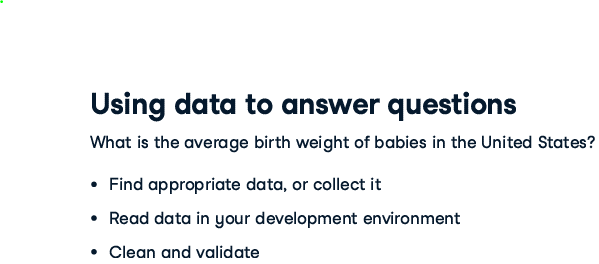

In [2]:
import pandas as pd

nsfg = pd.read_hdf('./Data/nsfg.hdf5', 'nsfg')

type(nsfg)

pandas.core.frame.DataFrame

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


### Columns and rows

In [4]:
nsfg.shape

(9358, 10)

In [5]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

### Each column is a Series

In [6]:
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

In [7]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

## Clean and Validate

### Selecting columns

In [8]:
pounds = nsfg['birthwgt_lb1']

In [9]:
ounces = nsfg['birthwgt_oz1']

In [10]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

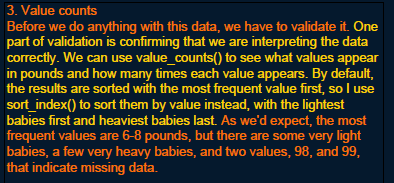

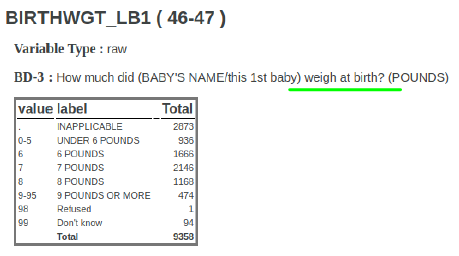

In [11]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

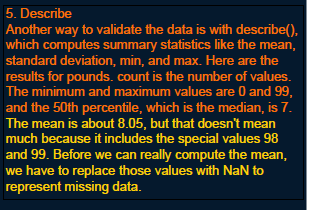

### Replace

In [13]:
import numpy as np

pounds = pounds.replace([98, 99], np.nan)
pounds.mean()

6.703286384976526

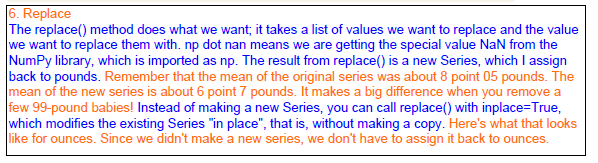

In [14]:
ounces.replace([98, 99], np.nan, inplace =  True)

### Arithmetic with Series

In [15]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

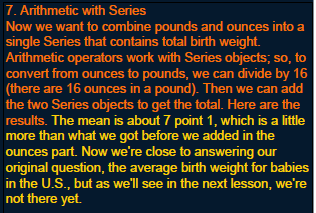

## Filter and Visualize

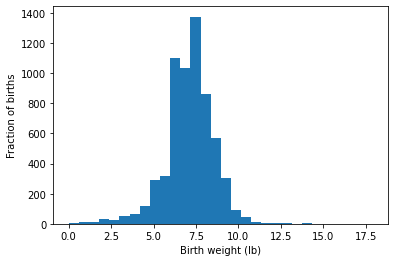

In [17]:
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins = 30)

plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

### Boolean Series

In [18]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [19]:
preterm.sum()

3742

In [20]:
preterm.mean()

0.39987176747168196

### Filtering

In [21]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [22]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

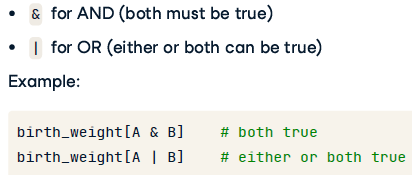

## Resampling

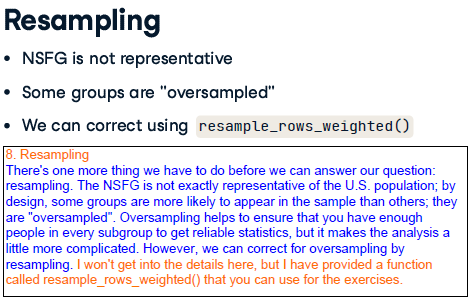